# Unveiling Performance Trends in Computer Hardware Using ARIMA Modeling

## Introduction :

The ever-increasing complexity and diversity in computer hardware systems pose a significant challenge in predicting their performance. With advancements in technology, understanding how various hardware specifications translate to actual performance has become more crucial than ever. This project aims to address this challenge by employing a time series forecasting approach, specifically using the ARIMA model, to predict the performance of computer hardware systems.

Our analysis focuses on a comprehensive dataset comprising various hardware attributes, such as machine cycle time, main memory, cache size, and benchmark performance scores. By applying sophisticated statistical techniques, we endeavor to uncover underlying patterns and trends that influence hardware performance. The insights derived from this study are aimed at aiding manufacturers in optimizing hardware designs and assisting consumers in making informed decisions.

In this notebook, we will walk through the process of data exploration, preprocessing, model fitting, and evaluation, showcasing the power of time series analysis in a practical and impactful domain.

## Instructions to follow :

Step 1: Handle missing entries in the dataset by:

    Displaying the number of missing values in each feature within a dataframe.
    Deleting features where the number of missing values exceeds 10% of the total sample size.

Step 2: Conduct Exploratory Data Analysis (EDA) on the target variable to examine:

    Autocorrelation.
    Seasonality.
    Stationarity.

Step 3: Transform the dataset by:

    Log-transforming the target variable.
    Shifting the log-transformed target variable by one unit.
    Re-evaluating for missing values and reapplying EDA techniques on the new target variable.

Step 4: Prepare the data for time series modeling by:

    Splitting the dataset into training and testing sets, ensuring the test set contains the last 12 months' observations.
    Tuning the parameters p, q, and d for the ARIMA model using a method of your choice.

Step 5: Assess the ARIMA model's performance using:

    The Sum of Squared Errors (SSE).
    The Root Mean Squared Error (RMSE).

### Dataset Features Explanation


#### Computer Hardware Dataset description :

The Computer Hardware dataset is a valuable resource for analyzing and understanding various computer hardware components and their performance metrics. This dataset contains a wide range of features describing different attributes of computer hardware, making it suitable for various machine learning and statistical analysis tasks. However, it's essential to identify the specific target variable within the dataset, which may represent a performance metric or a quality measure of the hardware components.

Before delving into analysis or modeling, it's crucial to explore the dataset thoroughly, check for missing values, and gain insights into the distribution of features. Depending on your research question or task, you can leverage this dataset for tasks such as regression, classification, clustering, or predictive modeling in the realm of computer hardware.

#### The dataset contains the following features:

- Vendor Name: The name of the manufacturer of the computer system.

- Model Name: The specific model name/number of the computer system.

- MYCT (Machine Cycle Time): The cycle time of the machine in nanoseconds. It represents the speed at which the processor can execute instructions. Lower values indicate faster performance.

- MMIN (Minimum Main Memory): The minimum amount of main memory in kilobytes that the computer system has.

- MMAX (Maximum Main Memory): The maximum amount of main memory in kilobytes that the computer system can support.

- CACH (Cache Memory): The amount of cache memory in kilobytes. Cache memory is faster than main memory and can improve processing speed.

- CHMIN (Minimum Channels): The minimum number of I/O channels. Channels are used for communication between the CPU and other devices.

- CHMAX (Maximum Channels): The maximum number of I/O channels.

- PRP (Published Relative Performance): A benchmark score indicating the relative performance of the system. This is often the target variable for prediction.

- ERP (Estimated Relative Performance): The estimated relative performance score from the original article. This might be used for validation or comparison.

## Step 1: Check for Missing Values

In [35]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('machine.data', header=None)

# Assign column names based on the machine.names file
column_names = [
    'Vendor Name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 
    'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'
]
df.columns = column_names

# Check for any missing values in the dataset
missing_values = df.isnull().sum()
missing_values_df = pd.DataFrame(missing_values, columns=['Number of Missing Values'])
missing_values_df['Percentage'] = (missing_values_df['Number of Missing Values'] / len(df)) * 100
missing_values_df


,Number of Missing Values,Percentage
Vendor Name,0,0.0
Model Name,0,0.0
MYCT,0,0.0
MMIN,0,0.0
MMAX,0,0.0
CACH,0,0.0
CHMIN,0,0.0
CHMAX,0,0.0
PRP,0,0.0
ERP,0,0.0


## Step 2: Exploratory Data Analysis (EDA)

### Check Autocorrelation:

<Figure size 1200x600 with 0 Axes>

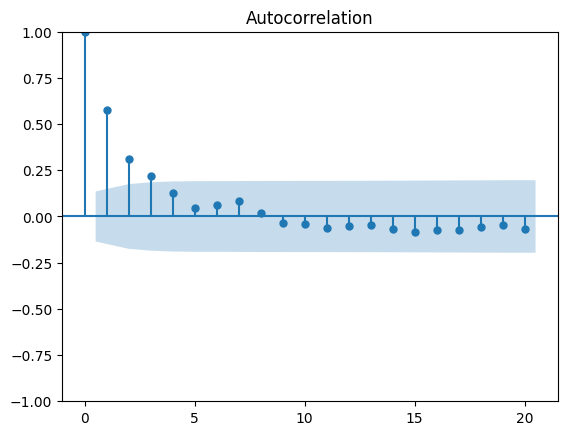

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot autocorrelation for the PRP column
plt.figure(figsize=(12, 6))
plot_acf(df['PRP'], lags=20)  # Adjust the number of lags as you see fit
plt.show()


### Check Stationarity:

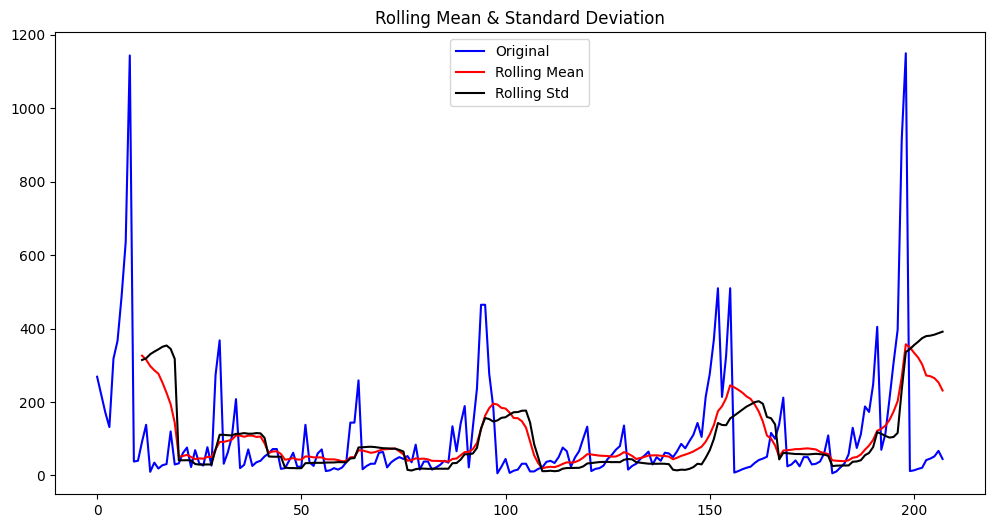

Results of Dickey-Fuller Test:
Test Statistic                  -5.385989
p-value                          0.000004
#Lags Used                       3.000000
Number of Observations Used    204.000000
Critical Value (1%)             -3.462818
Critical Value (5%)             -2.875815
Critical Value (10%)            -2.574379
dtype: float64


In [14]:
def test_stationarity(timeseries, window=12):
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    # Plotting rolling statistics:
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Applying the function to your time series data
test_stationarity(df['PRP'])


### Check Seasonality:

In the context of time series analysis, seasonality refers to periodic fluctuations in data points that are predictable and recurring over specific time intervals, such as daily, monthly, or yearly patterns. Seasonality analysis is pertinent when a dataset contains a temporal dimension, with data points explicitly associated with timestamped observations.

For our Computer Hardware dataset, the absence of a time component (such as a date or timestamp) precludes the analysis of seasonality. The dataset comprises specifications and performance metrics of various computer systems without sequential time-based recording. Therefore, no temporal cycles or seasonal trends are present for examination. Seasonality checks are thus not applicable to this dataset, as they rely on the premise of chronological order and temporal intervals, which our data does not exhibit.

## Step 3: Log-Transformation and Shift

In [4]:
import numpy as np

# Log-transform the PRP column and perform a one-unit shift
df['Log_PRP'] = np.log(df['PRP'] + 1)  # Log-transformation
df['Shifted_Log_PRP'] = df['Log_PRP'].shift(1)  # Shift
df = df.dropna().reset_index(drop=True)  # Drop NaN values post-shift

### Step 3: Revisting Step 1 : Check for Missing Values on Transformed Data

In [18]:
# Check for any missing values in the transformed and shifted dataset
missing_values_transformed = df.isnull().sum()
missing_values_transformed_df = pd.DataFrame(missing_values_transformed, columns=['Number of Missing Values'])
missing_values_transformed_df['Percentage'] = (missing_values_transformed_df['Number of Missing Values'] / len(df)) * 100
missing_values_transformed_df

,Number of Missing Values,Percentage
Vendor Name,0,0.0
Model Name,0,0.0
MYCT,0,0.0
MMIN,0,0.0
MMAX,0,0.0
CACH,0,0.0
CHMIN,0,0.0
CHMAX,0,0.0
PRP,0,0.0
ERP,0,0.0


### Step 3: Revisting Step 2 : EDA on the Transformed Data

### Check Autocorrelation:

<Figure size 1200x600 with 0 Axes>

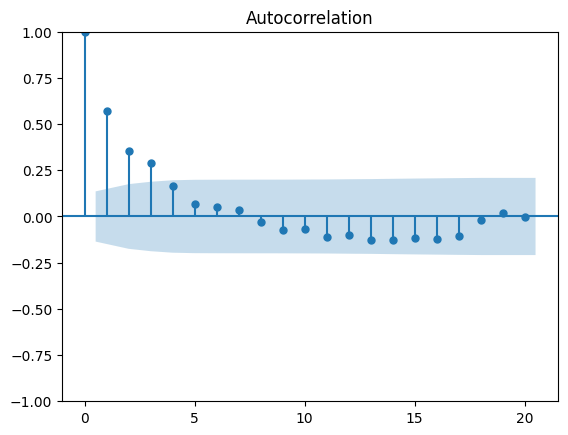

In [16]:
# Plot autocorrelation for the transformed and shifted PRP column
plt.figure(figsize=(12, 6))
plot_acf(df['Shifted_Log_PRP'], lags=20)  # Adjust the number of lags as you see fit
plt.show()


### Check Stationarity:

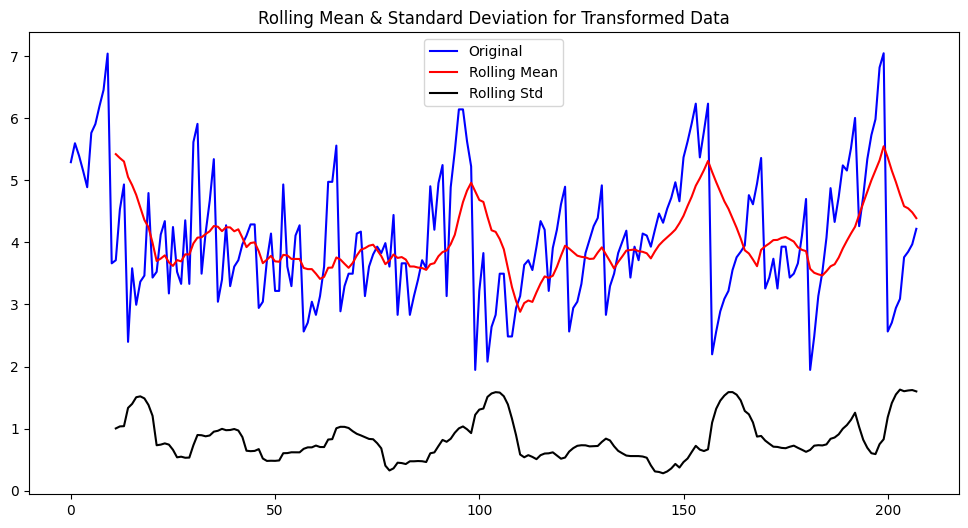

Results of Dickey-Fuller Test:
Test Statistic                -7.493274e+00
p-value                        4.447371e-11
#Lags Used                     0.000000e+00
Number of Observations Used    2.070000e+02
Critical Value (1%)           -3.462342e+00
Critical Value (5%)           -2.875606e+00
Critical Value (10%)          -2.574267e+00
dtype: float64


In [19]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity_with_visuals(timeseries, window=12):
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    # Plotting rolling statistics:
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for Transformed Data')
    plt.show()

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Applying the function to your transformed and shifted time series data
test_stationarity_with_visuals(df['Shifted_Log_PRP'])


## Step 4: Split the Data and application of Arima based on  AIC (Akaike Information Criterion)

In [21]:
# Assuming the dataset is in chronological order and the last 12 observations represent the most recent data

# Define the training and testing sets
train = df.iloc[:-12]  # All data except the last 12 months
test = df.iloc[-12:]   # The last 12 months of data

# The training and test sets are now ready to be used in the ARIMA modeling

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import warnings

# Assuming the target variable for ARIMA is 'PRP'
y_train = train['PRP']
y_test = test['PRP']

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Define a variable to store the best ARIMA model and associated AIC
best_aic = float("inf")
best_pdq = None
best_model = None

warnings.filterwarnings("ignore")  # Ignore warning messages for simplicity

# Grid search for the best ARIMA parameters
for param in pdq:
    try:
        model = ARIMA(y_train, order=param)
        results = model.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

print(f"Best ARIMA{best_pdq} model - AIC:{best_aic}")

# Fit the best model on the entire training set
final_model = ARIMA(y_train, order=best_pdq)
final_model_fit = final_model.fit()

# Forecast using the best model
forecast = final_model_fit.get_forecast(steps=len(y_test))
forecast_mean = forecast.predicted_mean

# Calculate the mean squared error on the test set
mse = mean_squared_error(y_test, forecast_mean)
print(f'Mean Squared Error of the forecast on the test set: {mse}')


ARIMA(0, 0, 0) - AIC:2477.9840288132705
ARIMA(0, 0, 1) - AIC:2421.9133456727336
ARIMA(0, 0, 2) - AIC:2411.7160956156777
ARIMA(0, 1, 0) - AIC:2428.6135725086706
ARIMA(0, 1, 1) - AIC:2407.619902434715
ARIMA(0, 1, 2) - AIC:2400.5908249076256
ARIMA(0, 2, 0) - AIC:2595.8087872712713
ARIMA(0, 2, 1) - AIC:2424.397798875923
ARIMA(0, 2, 2) - AIC:2404.634503242488
ARIMA(1, 0, 0) - AIC:2400.2295376705047
ARIMA(1, 0, 1) - AIC:2401.171236932314
ARIMA(1, 0, 2) - AIC:2402.4463911453604
ARIMA(1, 1, 0) - AIC:2417.2059356162044
ARIMA(1, 1, 1) - AIC:2392.5042690262994
ARIMA(1, 1, 2) - AIC:2393.239213412284
ARIMA(1, 2, 0) - AIC:2529.3347255478484
ARIMA(1, 2, 1) - AIC:2413.491601655407
ARIMA(1, 2, 2) - AIC:2424.7220899675754
ARIMA(2, 0, 0) - AIC:2401.4879248811644
ARIMA(2, 0, 1) - AIC:2402.820389058476
ARIMA(2, 0, 2) - AIC:2404.3400193935086
ARIMA(2, 1, 0) - AIC:2408.986018580662
ARIMA(2, 1, 1) - AIC:2393.603463252046
ARIMA(2, 1, 2) - AIC:2394.430568602126
ARIMA(2, 2, 0) - AIC:2489.0152089974745
ARIMA(2, 2

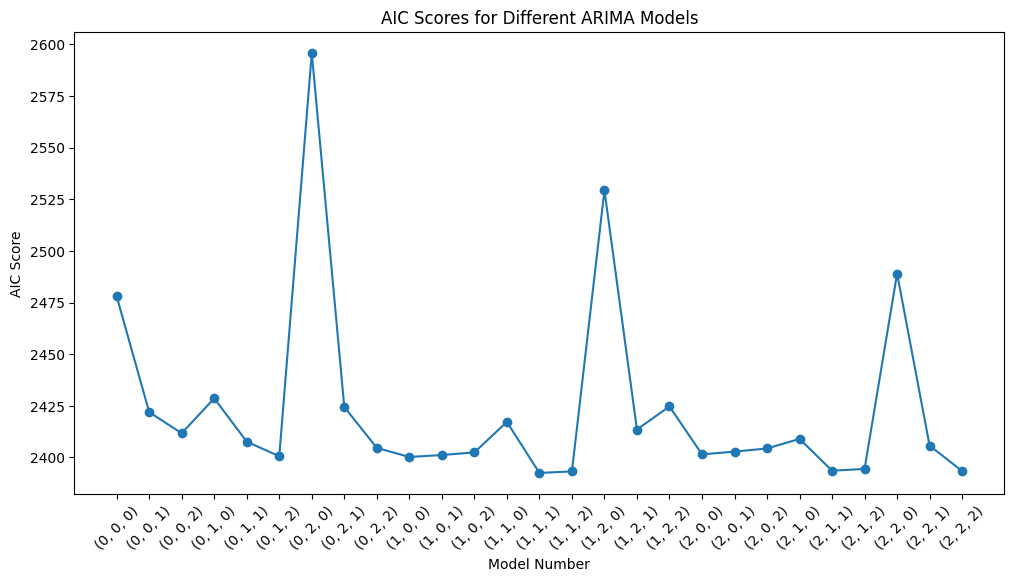

In [29]:
aic_scores = []
parameters = []

# Repeat the grid search process to store AIC scores
for param in pdq:
    try:
        model = ARIMA(y_train, order=param)
        results = model.fit()
        aic_scores.append(results.aic)
        parameters.append(param)
    except:
        continue

# Plotting AIC scores
plt.figure(figsize=(12, 6))
plt.plot(range(len(aic_scores)), aic_scores, marker='o')
plt.title('AIC Scores for Different ARIMA Models')
plt.xlabel('Model Number')
plt.ylabel('AIC Score')
plt.xticks(range(len(aic_scores)), [str(p) for p in parameters], rotation=45)
plt.show()


## Step 5: Model Fitting and Evaluation

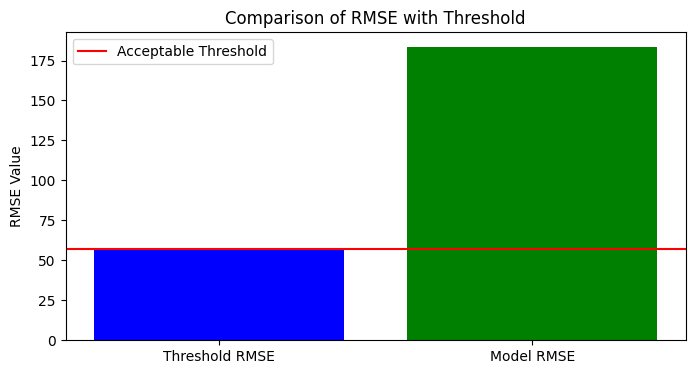

Defined RMSE threshold: 57.2
ARIMA model's RMSE: 183.4850096342638
The model's performance exceeds the acceptable error range and may need improvements.


In [28]:
# Calculate the range of the target variable (PRP)
prp_range = df['PRP'].max() - df['PRP'].min()

# Define a threshold as 5% of the range
threshold_rmse = 0.05 * prp_range

# Calculate RMSE (assuming you already have the RMSE value calculated)
# rmse = ...

# Plotting the RMSE and the threshold for visual comparison
plt.figure(figsize=(8, 4))
plt.bar(['Threshold RMSE', 'Model RMSE'], [threshold_rmse, rmse], color=['blue', 'green'])
plt.ylabel('RMSE Value')
plt.title('Comparison of RMSE with Threshold')
plt.axhline(y=threshold_rmse, color='r', linestyle='-', label='Acceptable Threshold')
plt.legend()
plt.show()

# Interpretation
print(f"Defined RMSE threshold: {threshold_rmse}")
print(f"ARIMA model's RMSE: {rmse}")
if rmse < threshold_rmse:
    print("The model's performance is within the acceptable error range.")
else:
    print("The model's performance exceeds the acceptable error range and may need improvements.")
